In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 60

In [3]:
df = pd.read_csv('breast_cancer.csv')

df.head(25)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

df['diagnosis'].replace('M', 0, inplace=True)
df['diagnosis'].replace('B', 1, inplace=True)

df.head(25)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [8]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = logModel.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: {:.2f}%\n'.format(acc*100))
print("Report:\n", classification_report(y_test, y_pred))

y_pred_train = logModel.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

print('Accuracy train: {:.2f}%\n'.format(acc_train*100))
print("Report train:\n", classification_report(y_train, y_pred_train))

Accuracy: 97.37%

Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy train: 98.68%

Report train:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



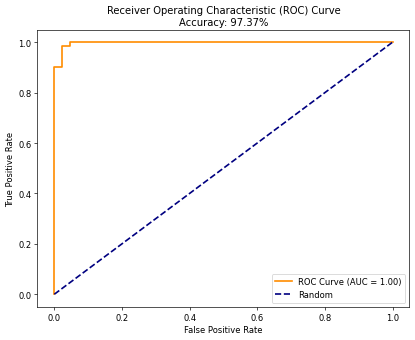

In [12]:
y_probability = logModel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(acc * 100))
plt.legend(loc="lower right")
plt.show()

In [13]:
features = X.columns.tolist()

coefficients = logModel.coef_[0]
intercept = logModel.intercept_[0]

equation_terms = [f"{coef:.4f}*{feature}" for coef, feature in zip(coefficients, features)]
equation = " + ".join(equation_terms)
equation = f"LogOdds = {intercept:.4f} + {equation}"

equation

'LogOdds = 0.4456 + -0.4319*radius_mean + -0.3873*texture_mean + -0.3934*perimeter_mean + -0.4652*area_mean + -0.0717*smoothness_mean + 0.5402*compactness_mean + -0.8015*concavity_mean + -1.1198*concave points_mean + 0.2361*symmetry_mean + 0.0759*fractal_dimension_mean + -1.2682*radius_se + 0.1889*texture_se + -0.6106*perimeter_se + -0.9072*area_se + -0.3133*smoothness_se + 0.6825*compactness_se + 0.1753*concavity_se + -0.3113*concave points_se + 0.5004*symmetry_se + 0.6162*fractal_dimension_se + -0.8798*radius_worst + -1.3506*texture_worst + -0.5895*perimeter_worst + -0.8418*area_worst + -0.5442*smoothness_worst + 0.0161*compactness_worst + -0.9431*concavity_worst + -0.7782*concave points_worst + -1.2082*symmetry_worst + -0.1574*fractal_dimension_worst'

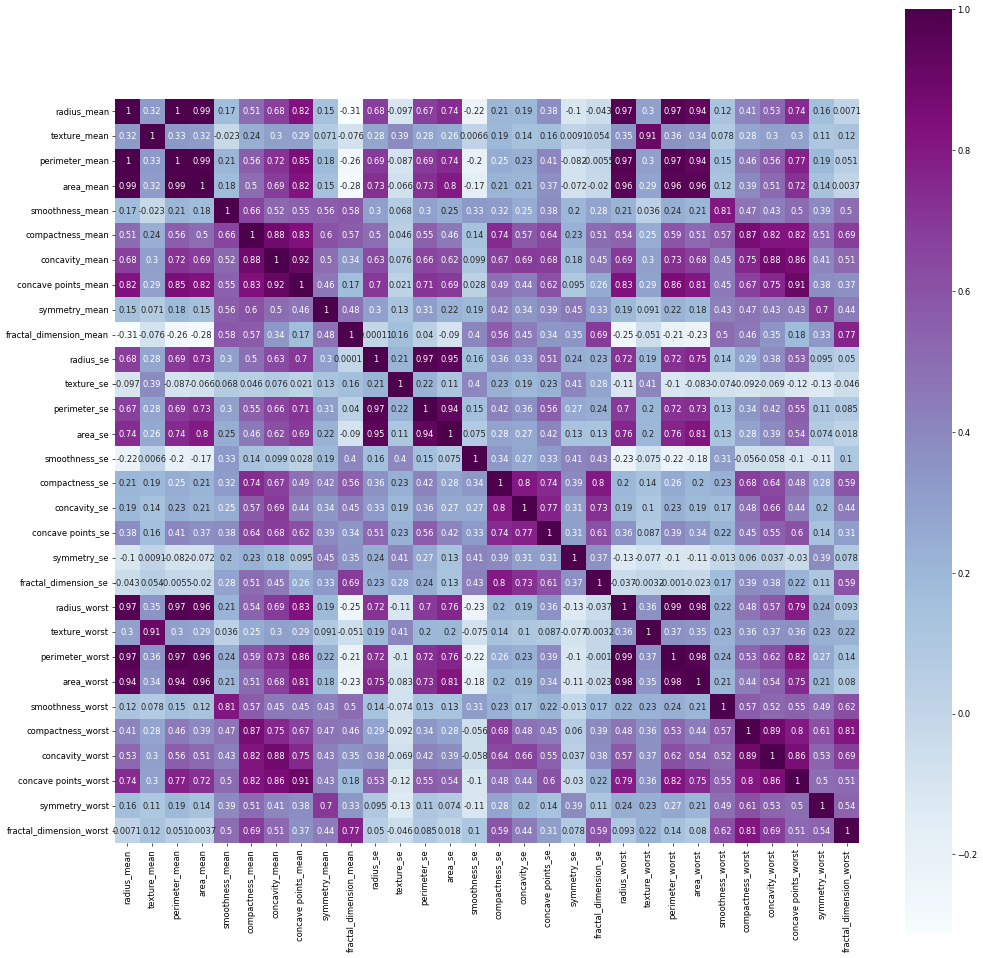

In [14]:
plt.figure(figsize=(20, 20))
p=sns.heatmap(df.drop('diagnosis', axis=1).corr(), annot=True, cmap="BuPu", square=True)

Будем разбирать этот график пошагово. Как мы можем заметить - здесь имеется мультиколлинеарность между несколькими переменными. Начнем с радиуса, периметра и площади, которые указывают на размер клеток. Мы можем заметить, что корелляция между этими переменными колеблется от 0.67 (standard error) до 1 (mean), соответственно будем избавляться от ненужных переменных. из всех 3 (радиус, площадь, периметр), независимым фактором от остальных является радиус, так как именно на основе него строятся все остальные формулы окружности. Соответственно оставляем радиус и удаляем периметр и площадь.

У нас имеется корелляция между mean и worst. Каждый из них показывает достаточно высокую корелляцию (0,7 - 0,97). Склоняюсь к исключению переменных worst так как mean, как мне кажется - усредненные значения, и они будут важнее для модели.

Так же наблюдаются некие корелляции между переменными compactness, concavity и concave points. Скорее всего речь идет о форме клеток, исходя из этого рискну предположить, что компактность будет важнее для будущей модели, соответственно concave points и concavity будут исключены из нее.

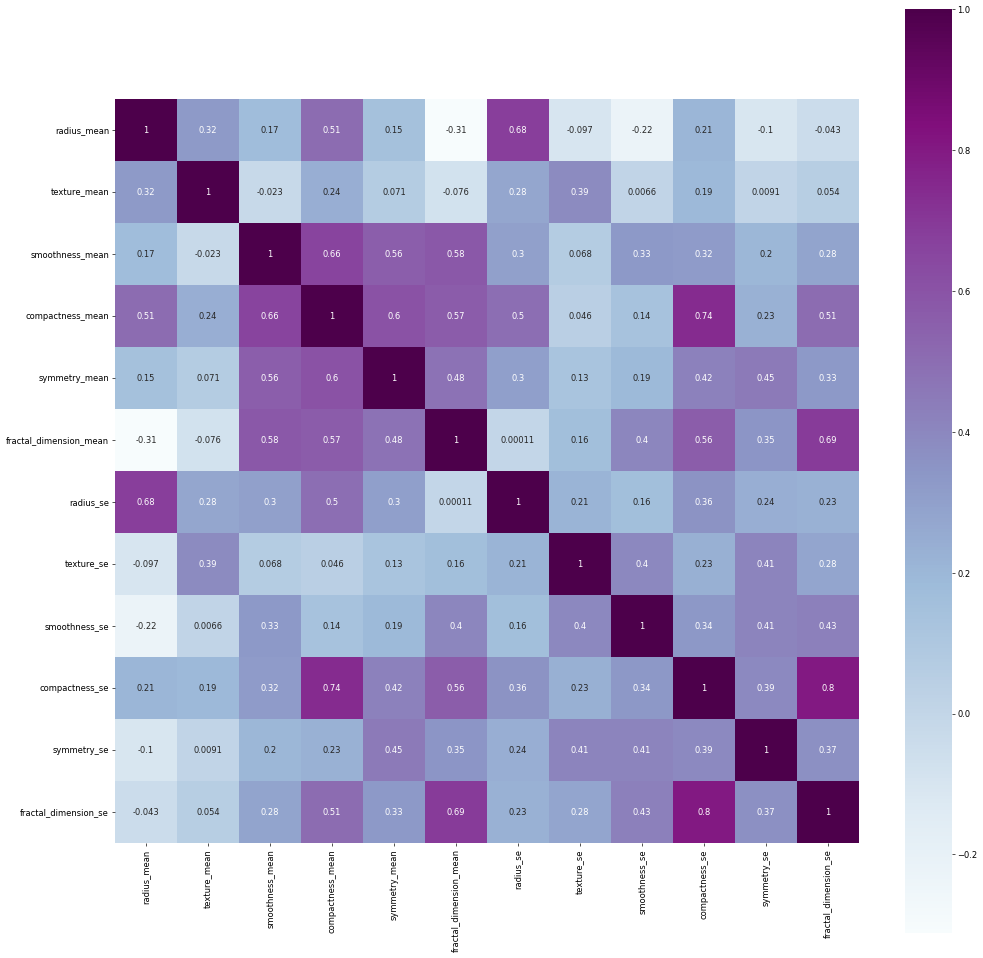

In [15]:
df.drop(['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean', 'area_se', 'area_worst'], axis=1, inplace=True)
df.drop(['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)
df.drop(['concavity_mean', 'concavity_se', 'concave points_mean', 'concave points_se'], axis=1, inplace=True)

plt.figure(figsize=(20, 20))
p=sns.heatmap(df.drop('diagnosis', axis=1).corr(), annot=True, cmap="BuPu", square=True)

In [16]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((455, 12), (114, 12))

In [18]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = logModel.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: {:.2f}%\n'.format(acc*100))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 95.61%

Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



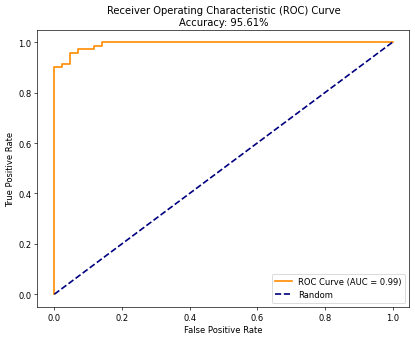

In [20]:
y_probability = logModel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(acc * 100))
plt.legend(loc="lower right")
plt.show()

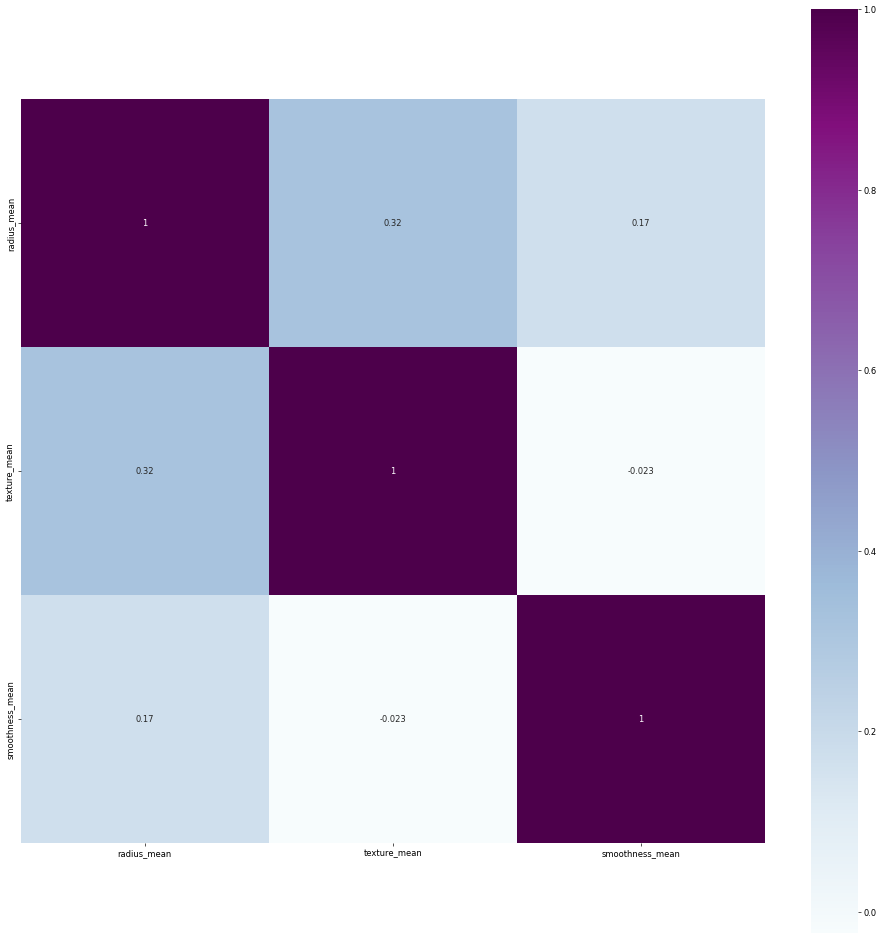

In [21]:
df.drop(['compactness_mean', 'fractal_dimension_mean', 'symmetry_mean', 'compactness_se', 'fractal_dimension_se', 'symmetry_se',], axis=1, inplace=True)
df.drop(['radius_se', 'texture_se', 'smoothness_se'], axis=1, inplace=True)

plt.figure(figsize=(20, 20))
p=sns.heatmap(df.drop('diagnosis', axis=1).corr(), annot=True, cmap="BuPu", square=True)

In [22]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((455, 3), (114, 3))

In [24]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = logModel.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: {:.2f}%\n'.format(acc*100))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 93.86%

Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



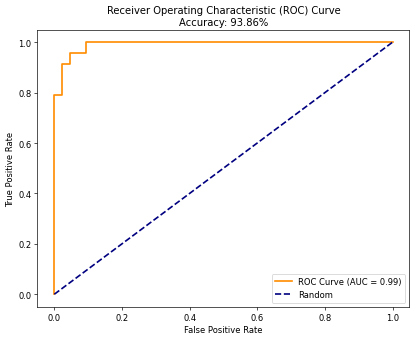

In [26]:
y_probability = logModel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(acc * 100))
plt.legend(loc="lower right")
plt.show()

In [27]:
features = X.columns.tolist()

coefficients = logModel.coef_[0]
intercept = logModel.intercept_[0]

equation_terms = [f"{coef:.4f}*{feature}" for coef, feature in zip(coefficients, features)]
equation = " + ".join(equation_terms)
equation = f"LogOdds = {intercept:.4f} + {equation}"

equation

'LogOdds = 0.9390 + -3.6010*radius_mean + -1.2694*texture_mean + -1.5707*smoothness_mean'

Исходя из финальных результатов, я могу прийти к выводу, что несмотря на высокую корреляцию переменных они представляют собой важную информацию для предсказания, из-за чего после их удаления снижается его точность. 